In [1]:
import sys
print(sys.prefix)
print(sys.executable)

import site
print(site.getsitepackages())

import os
print(os.getcwd())
#print(os.path.basename(__file__))

from glob import glob
import numpy as np
import pandas as pd
import dask.dataframe as dd
import time
import logging

/Users/rahulsagrolikar/opt/anaconda3
/Users/rahulsagrolikar/opt/anaconda3/bin/python
['/Users/rahulsagrolikar/opt/anaconda3/lib/python3.9/site-packages']
/Users/rahulsagrolikar/Downloads


In [14]:
df = pd.read_csv('dummy_data.csv')

In [15]:
df

,description,amount,currency,date,balance,category,merchant
0,Series Seed Investment from Investor Llc,50000.0,USD,2020-10-08,998850.0,Equity Investment,NaN
1,UPS*0000001R00F6399,-209.0,USD,2020-10-08,1048850.0,Postage,UPS
2,CASH APP*Jamie Parker 123456,-60.0,USD,2020-10-08,1048641.0,P2P Transfers,Cash App
3,ACH PMT A0000 AMEX EPAYMENT COID,-198.0,USD,2020-10-08,1048581.0,Credit Card,American Express
4,TRANSFER INV 123456 EDI PMT WALMART,280.0,USD,2020-10-10,1048383.0,Revenue,Walmart
...,...,...,...,...,...,...,...
468,MOBILE DEPOSIT,147.0,USD,2021-08-20,1076642.7,Check Deposits,NaN
469,PITNEY BOWES,-20.0,USD,2021-08-21,1076789.7,Inventory,Pitney Bowes
470,SERVICE CHARGE,-12.0,USD,2021-08-22,1076769.7,Charges/Fees,NaN
471,WWW.ALIBABA.COM DELAWARE DE,-3816.0,USD,2021-08-24,1077137.7,Inventory,Alibaba.com


In [43]:
#rename null values in category column
df.category=df[['category']].fillna('spend_category')

In [16]:
df.currency.unique()

array(['USD'], dtype=object)

In [44]:
df.category.unique()

array(['Equity Investment', 'Postage', 'P2P Transfers', 'Credit Card',
       'Revenue', 'Check Outflows', 'Advertising', 'Inventory',
       'Payroll and Consultants', 'Software', 'ATM Cash Inflows',
       'Debt Repayment', 'Travel', 'Insurance', 'spend_category',
       'Reconciled Intra-Company transfers', 'Other expenses',
       'Charges/Fees', 'Rent', 'Unreconciled Intra-Company transfers',
       'Debt Investment', 'Check Deposits', 'ATM Cash Outflows', 'Taxes',
       'Utilities'], dtype=object)

In [45]:
category_grouped = df.groupby("category").amount.sum().reset_index()
category_grouped

,category,amount
0,ATM Cash Inflows,6294.0
1,ATM Cash Outflows,-400.0
2,Advertising,-38926.0
3,Charges/Fees,-96.0
4,Check Deposits,2744.0
5,Check Outflows,-3465.0
6,Credit Card,-2296.0
7,Debt Investment,20000.0
8,Debt Repayment,-15300.0
9,Equity Investment,50000.0


In [19]:
category_grouped[category_grouped.amount>0] ## sources of income

,category,amount
0,ATM Cash Inflows,6294.0
4,Check Deposits,2744.0
7,Debt Investment,20000.0
9,Equity Investment,50000.0
16,Reconciled Intra-Company transfers,1500.0
18,Revenue,156203.0
22,Unreconciled Intra-Company transfers,1160.0


<AxesSubplot:xlabel='category', ylabel='amount'>

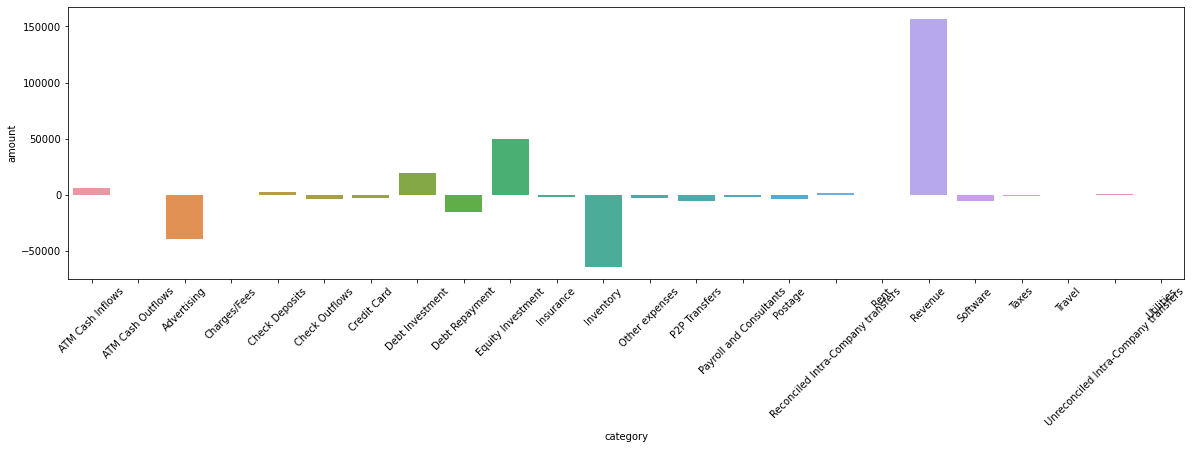

In [20]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation=45)
sns.barplot(data=category_grouped, x="category", y="amount")

<AxesSubplot:xlabel='category', ylabel='amount'>

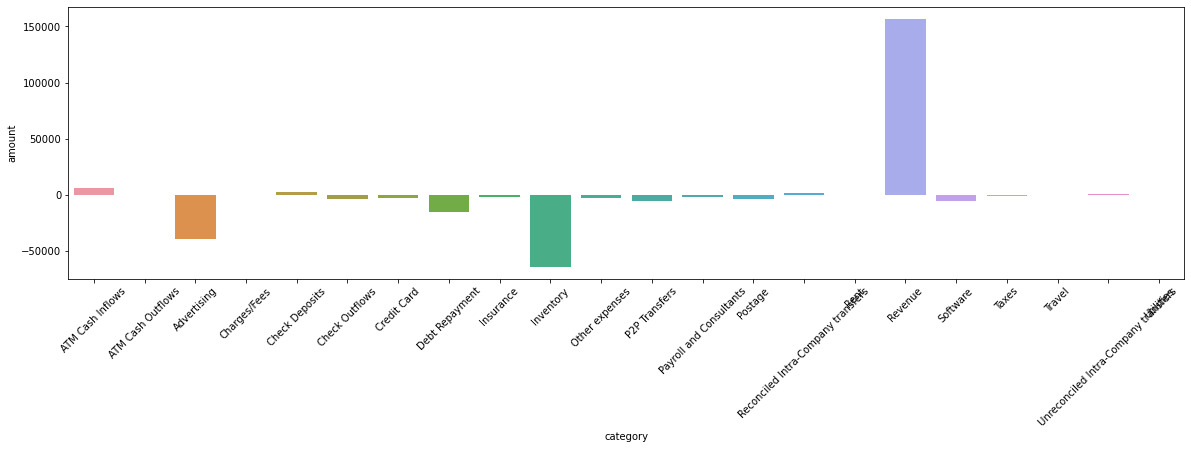

In [21]:
plt.figure(figsize = (20, 5))
plt.xticks(rotation=45)
temp_df = category_grouped[~category_grouped.category.str.contains("Investment", case = False, na = False)]
sns.barplot(data=temp_df, x="category", y="amount")

# 1. Is this company in good financial health?
Key factors:

should have more incoming amount than outgoing

balance should ideally increase over time

In [22]:
df[df.amount>0].sort_values("amount", ascending = False).head(10)

,description,amount,currency,date,balance,category,merchant
0,Series Seed Investment from Investor Llc,50000.0,USD,2020-10-08,998850.00,Equity Investment,NaN
125,TRANSFER ST-W2Q9V4R9I9J9 STRIPE,16000.0,USD,2021-09-08,1094986.70,Revenue,Stripe
237,BlueVine BlueVine *********** ACH DEP,10000.0,USD,2020-11-26,1033920.35,Debt Investment,BlueVine
117,SHOPIFY CAPITAL,10000.0,USD,2021-09-01,1073131.70,Debt Investment,Shopify Capital
351,SHOPIFY TRANSFER,7000.0,USD,2021-04-01,1049635.70,Revenue,Shopify
329,TRANSFER ST-A4A2T8Y7S7T2 STRIPE,6390.0,USD,2021-03-14,1046425.70,Revenue,Stripe
316,SHOPIFY TRANSFER,6000.0,USD,2021-03-01,1041413.70,Revenue,Shopify
35,TRANSFER ST-W2Q9V4R9I9J9 STRIPE,6000.0,USD,2021-09-07,1088986.70,Revenue,Stripe
100,TRANSFER INV 123456 EDI PMT WALMART,5500.0,USD,2021-06-28,1072046.70,Revenue,Walmart
37,TRANSFER INV 123456 EDI PMT WALMART,5500.0,USD,2021-09-06,1083486.70,Revenue,Walmart


In [46]:
## net amount in  bank
df.amount.sum() # positive

90886.7

In [47]:
#net amount if we remove investment
df1 = category_grouped[~category_grouped.category.str.contains("Investment", case = False, na = False)]
df1.amount.sum()

20886.7

In [48]:
## avg income per transaction vs spend per transaction
df[df.amount>0].amount.mean(), df[df.amount<0].amount.mean()

(2205.697247706422, -410.8085164835164)

In [49]:
df[df.category.str.contains("Investment", case = False, na = False)]

,description,amount,currency,date,balance,category,merchant
0,Series Seed Investment from Investor Llc,50000.0,USD,2020-10-08,998850.00,Equity Investment,NaN
117,SHOPIFY CAPITAL,10000.0,USD,2021-09-01,1073131.70,Debt Investment,Shopify Capital
237,BlueVine BlueVine *********** ACH DEP,10000.0,USD,2020-11-26,1033920.35,Debt Investment,BlueVine


In [50]:
## investment should not count as incoming payment towards providing goods and services.
df[~df.category.str.contains("Investment", case = False, na = False) & (df.amount>0)].amount.mean()

1607.745283018868

So we  see that we have more incoming amount (1607) on an average compared to outgoing (410)

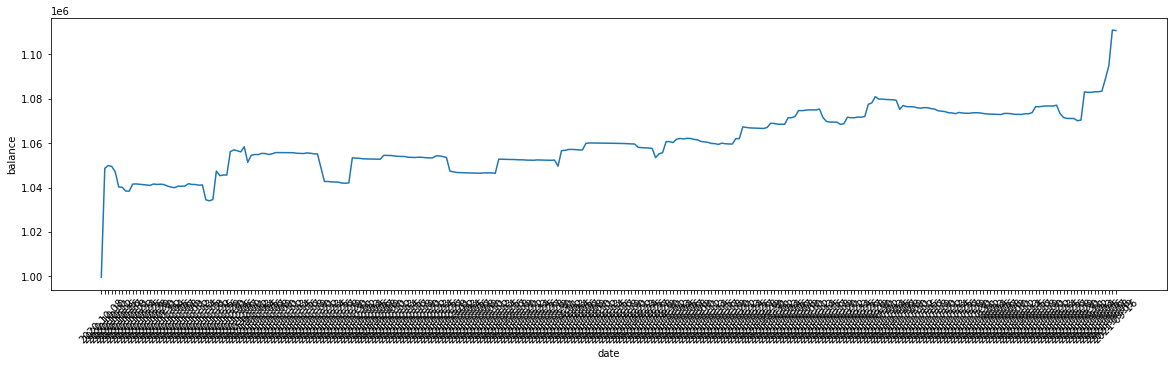

In [30]:
## we have multiple days so let's look at the closing amount every day.
plt.figure(figsize = (20, 5))
plt.xticks(rotation=45)
closing_balance = df.groupby('date')['balance'].last()

# Line plot of daily balance
sns.lineplot(data=closing_balance)
plt.show()

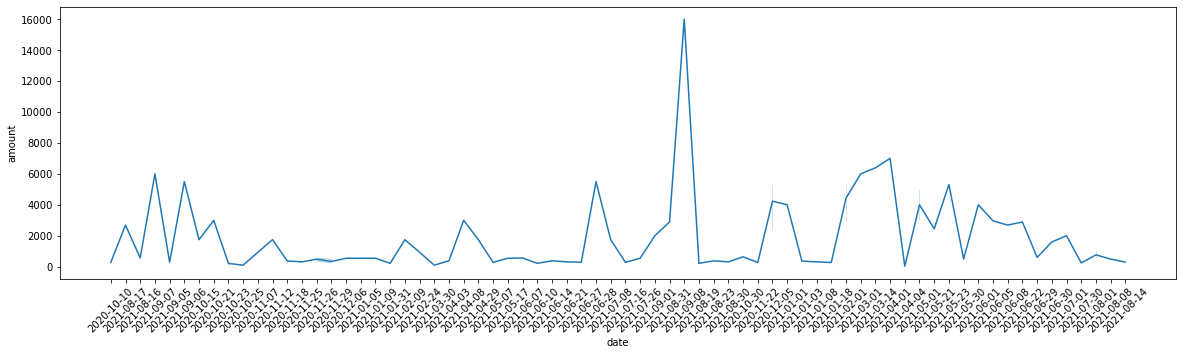

In [31]:
#Lets look at Revenue each day
plt.figure(figsize = (20, 5))
rev_df = df[df.category.str.contains("Revenue", case = False, na = False)]
plt.xticks(rotation=45)
sns.lineplot(data=rev_df, x="date", y = "amount")
plt.show()

In [32]:
category_grouped[category_grouped.amount>0] ## sources of income

,category,amount
0,ATM Cash Inflows,6294.0
4,Check Deposits,2744.0
7,Debt Investment,20000.0
9,Equity Investment,50000.0
16,Reconciled Intra-Company transfers,1500.0
18,Revenue,156203.0
22,Unreconciled Intra-Company transfers,1160.0


In [ ]:
## Although the time period is small, balance is increasing over time and the incoming amount is more than spends.
## So earnings per $ spend is more than 1.
## also, revenue is roughly three times the investments which might be an indicator that the money has been spent in right places to generate good revenue
## Company also paid back more than 75% of debt investment
## Even if we remove investment part, company still has positive profit margin 
## The company appears to be in good financial health.

# Recurring transactions
To determine if they are generating value for the company, we should be considering incoming transactions only and not related to investments.

In [51]:
incoming_transactions = df[~df.category.str.contains("Investment", case = False, na = False) & (df.amount<0)]
incoming_transactions

,description,amount,currency,date,balance,category,merchant
1,UPS*0000001R00F6399,-209.0,USD,2020-10-08,1048850.0,Postage,UPS
2,CASH APP*Jamie Parker 123456,-60.0,USD,2020-10-08,1048641.0,P2P Transfers,Cash App
3,ACH PMT A0000 AMEX EPAYMENT COID,-198.0,USD,2020-10-08,1048581.0,Credit Card,American Express
5,CHECK #0000,-222.0,USD,2020-10-10,1048663.0,Check Outflows,NaN
6,CHECK #0000,-100.0,USD,2020-10-16,1042062.0,Check Outflows,NaN
...,...,...,...,...,...,...,...
466,GOOGLE ADS ADS,-300.0,USD,2021-08-11,1073305.7,Advertising,Google
469,PITNEY BOWES,-20.0,USD,2021-08-21,1076789.7,Inventory,Pitney Bowes
470,SERVICE CHARGE,-12.0,USD,2021-08-22,1076769.7,Charges/Fees,NaN
471,WWW.ALIBABA.COM DELAWARE DE,-3816.0,USD,2021-08-24,1077137.7,Inventory,Alibaba.com


In [52]:
incoming_transactions.groupby("merchant").size().reset_index().sort_values(0) ## every merchant is recurring in the given timeframe

,merchant,0
13,Gitlab,2
14,Golden Nugget,2
11,Fiverr,2
8,CVS Pharmacy,2
7,Buffalo Wild Wings,2
26,Uber,2
1,Alibaba.com,2
4,Apple,3
23,U-Haul,3
12,Frontier,3


In [53]:
incoming_transactions_grouped = incoming_transactions.groupby("merchant").agg({"merchant":"size", "amount":"sum"})
incoming_transactions_grouped["ticket_size"] = incoming_transactions_grouped["amount"]/incoming_transactions_grouped["merchant"] 
incoming_transactions_grouped

,merchant,amount,ticket_size
merchant,,,
ADP,4,-600.0,-150.000000
Alibaba.com,2,-7632.0,-3816.000000
Amazon,16,-1022.0,-63.875000
American Express,11,-2296.0,-208.727273
Apple,3,-39.0,-13.000000
Arby's,3,-201.0,-67.000000
BlueVine,10,-11000.0,-1100.000000
Buffalo Wild Wings,2,-56.0,-28.000000
CVS Pharmacy,2,-24.0,-12.000000


In [54]:
incoming_transactions.groupby("merchant").amount.sum().reset_index().sort_values("amount") ## every merchant is recurring in the given timeframe

,merchant,amount
20,Paypal,-58644.0
15,Google,-36885.0
6,BlueVine,-11000.0
1,Alibaba.com,-7632.0
9,Cash App,-5046.0
22,Shopify Capital,-4000.0
24,UPS,-3120.0
3,American Express,-2296.0
10,Facebook,-2041.0
18,Intuit,-1892.0


# for a transaction to be recurring, the transaction amount should repeat after some time interva

In [55]:
def mark_recurring_transactions_for_merchant(merch_transactions, merchant_name):
    ## filter the merchant
    merch_transactions_filtered = merch_transactions[merch_transactions.merchant == merchant_name]
    
    ## as description is not an indicator of recurring payment, we can group on amount and label each group with unique IDs.
    merch_transactions_filtered["recurring_id"] = merch_transactions_filtered.groupby("amount").grouper.group_info[0] + 1
    
    ## if a recurring_id appears multiple times, it is a part of a recurring paymemt.
    recurring_id_counts = merch_transactions_filtered.groupby("recurring_id").size().reset_index().rename(columns = {0:"recurring_count"})
    
    ## gather all recurring ids with count >1
    all_recurring_ids = list(recurring_id_counts[recurring_id_counts.recurring_count>1].recurring_id)
    
    ## all recurring label
    merch_transactions_filtered["is_recurring"] = False
    merch_transactions_filtered.loc[merch_transactions_filtered.recurring_id.isin(all_recurring_ids), "is_recurring"] = True
    
    return merch_transactions_filtered

In [56]:
all_merchants = list(incoming_transactions_grouped.index)
recurring_payments_df = pd.DataFrame()

for merch in all_merchants:
    recurring_marked = mark_recurring_transactions_for_merchant(incoming_transactions, merch)
    recurring_payments_df = pd.concat((recurring_payments_df, recurring_marked))

/var/folders/hd/mw_tw54s53z5d4ykhbwxpmpm0000gn/T/ipykernel_51729/1307082269.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merch_transactions_filtered["recurring_id"] = merch_transactions_filtered.groupby("amount").grouper.group_info[0] + 1
/var/folders/hd/mw_tw54s53z5d4ykhbwxpmpm0000gn/T/ipykernel_51729/1307082269.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merch_transactions_filtered["is_recurring"] = False
/var/folders/hd/mw_tw54s53z5d4ykhbwxpmpm0000gn/T/ipykernel_51729/1307082269.py:6: Set

In [57]:
recurring_payments_df

,description,amount,currency,date,balance,category,merchant,recurring_id,is_recurring
12,ADP 401k ABC12345ABC ADP 401,-150.00,USD,2020-11-21,1035137.00,Payroll and Consultants,ADP,1,True
171,ADP 401k RC80AU101843W01 ADP 401,-150.00,USD,2020-10-21,1038373.00,Payroll and Consultants,ADP,1,True
275,ADP 401k ABC12345ABC ADP 401,-150.00,USD,2021-01-19,1055620.35,Payroll and Consultants,ADP,1,True
355,ADP 401k RC80AU101843W01 ADP 401,-150.00,USD,2021-04-06,1057115.70,Payroll and Consultants,ADP,1,True
417,WWW.ALIBABA.COM DELAWARE DE,-3816.00,USD,2021-06-15,1075372.70,Inventory,Alibaba.com,1,True
...,...,...,...,...,...,...,...,...,...
361,USPS.COM CLICKNSHIP,-22.00,USD,2021-04-13,1060027.70,Postage,USPS,2,True
380,USPS POSTAGE STAMPS.C EL SEGUNDO,-25.00,USD,2021-05-02,1060730.70,Postage,USPS,1,True
438,USPS POSTAGE STAMPS.C EL SEGUNDO,-25.00,USD,2021-07-11,1076421.70,Postage,USPS,1,True
16,Uber,-10.65,USD,2021-01-24,1042748.35,Travel,Uber,1,True


In [58]:
recurring_payments_df.is_recurring.value_counts()

True     273
False     20
Name: is_recurring, dtype: int64

In [59]:
recurring_payments_df.is_recurring.value_counts(normalize=True)

True     0.931741
False    0.068259
Name: is_recurring, dtype: float64

In [ ]:
## of all the incoming transactions that are not investments and have a corresponding merchant,
## ~ 80% of transactions are recurring. 

# 1. How would you measure the accuracy of your approach?
Currently, this approach is reliant on amount and amount serves as an indicator for whether it was recurring or not. However, this may not be always true. We don't have any other indicators in the dataset to determine so assuming a repeat amount literally indicates a recurring transaction, the approach proposed is determinstic and 100% accurate.

2. What other approaches would you investigate if you had more time?
As there are no other indicators in the dataset, the above approach is the only approach to figure out recurring transactions. If in case the transaction description had more info about the transaction, such as what specific service that transaction was made for, using string-based matching or substring search could have been tried.

However, as mentioned earlier, there are no other indicators so we would have to rely on transaction amount.